In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE

import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
telecom_churn_df = pd.read_csv('telecom_churn_data.csv')
telecom_churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
# check if there is any row where every attribute is missing
missingDataCount = telecom_churn_df.isnull().all(axis=1).sum()
print("Number of rows with all missing attrubutes is", missingDataCount)

Number of rows with all missing attrubutes is 0


In [4]:
# Populate the resultant/dependent variable "churn"
telecom_churn_df['churn'] = telecom_churn_df.apply(lambda x: 1 if (x['total_ic_mou_9'] == 0 and x['total_og_mou_9'] == 0 and x['vol_2g_mb_9'] == 0 and x['vol_3g_mb_9'] == 0) else 0, axis=1)
telecom_churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58,1
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00,0
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00,0
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00,0
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00,0


In [5]:
# drop last-date columns as they contain same value for all rows i.e zero variation in data
telecom_churn_df.drop(columns=['last_date_of_month_6','last_date_of_month_7',
                               'last_date_of_month_8', 'last_date_of_month_9'], inplace=True)
telecom_churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,...,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58,1
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,...,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00,0
2,7001625959,109,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,...,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00,0
3,7001204172,109,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,...,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00,0
4,7000142493,109,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,...,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00,0


In [6]:
# Find columns which contain same value for all rows of the data-set

temp_df = pd.DataFrame(telecom_churn_df.nunique()).reset_index()
temp_df.rename(columns={0:"count", "index":"column_name"}, inplace=True)

# Display the list of columns which have only one value
temp_df.loc[temp_df['count'] < 2]

,column_name,count
1,circle_id,1
2,loc_og_t2o_mou,1
3,std_og_t2o_mou,1
4,loc_ic_t2o_mou,1
57,std_og_t2c_mou_6,1
58,std_og_t2c_mou_7,1
59,std_og_t2c_mou_8,1
60,std_og_t2c_mou_9,1
109,std_ic_t2o_mou_6,1
110,std_ic_t2o_mou_7,1


In [7]:
# Delete the columns that contain same value for all rows i.e zero variation in data

column_list = temp_df.loc[temp_df['count'] < 2]["column_name"].tolist()

telecom_churn_df.drop(columns = column_list, inplace=True)

telecom_churn_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,...,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58,1
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,...,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00,0
2,7001625959,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,...,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00,0
3,7001204172,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,...,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00,0
4,7000142493,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,...,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00,0


In [8]:
# Delete the columns which ends with _9, as we dont need to analyze the last month data 

telecom_churn_df.drop(columns= [col for col in telecom_churn_df if col.endswith('_9')], inplace=True)

telecom_churn_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,...,0,1.0,1.0,1.0,968,30.4,0.0,101.20,3.58,1
1,7001865778,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,...,0,NaN,1.0,1.0,1006,0.0,0.0,0.00,0.00,0
2,7001625959,167.690,189.058,210.226,11.54,55.24,37.26,143.33,220.59,208.36,...,0,NaN,NaN,NaN,1103,0.0,0.0,4.17,0.00,0
3,7001204172,221.338,251.102,508.054,99.91,54.39,310.98,123.31,109.01,71.68,...,0,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00,0
4,7000142493,261.636,309.876,238.174,50.31,149.44,83.89,76.96,91.88,124.26,...,0,0.0,NaN,NaN,1526,0.0,0.0,0.00,0.00,0


In [9]:
# Impute the data for columns which are responsible for
# determining threshold value for defining high value custmer

telecom_churn_df['total_rech_data_6'].fillna(value = 0, inplace=True)
telecom_churn_df['total_rech_data_7'].fillna(value = 0, inplace=True)
telecom_churn_df['total_rech_data_8'].fillna(value = 0, inplace=True)

telecom_churn_df['av_rech_amt_data_6'].fillna(value = 0, inplace=True)
telecom_churn_df['av_rech_amt_data_7'].fillna(value = 0, inplace=True)
telecom_churn_df['av_rech_amt_data_8'].fillna(value = 0, inplace=True)


telecom_churn_df['max_rech_data_6'].fillna(value = 0, inplace=True)
telecom_churn_df['max_rech_data_7'].fillna(value = 0, inplace=True)
telecom_churn_df['max_rech_data_8'].fillna(value = 0, inplace=True)

#Impute the data 
telecom_churn_df['night_pck_user_6'].fillna(value = -1, inplace=True)
telecom_churn_df['night_pck_user_7'].fillna(value = -1, inplace=True)
telecom_churn_df['night_pck_user_8'].fillna(value = -1, inplace=True)

telecom_churn_df['fb_user_6'].fillna(value = -1, inplace=True)
telecom_churn_df['fb_user_7'].fillna(value = -1, inplace=True)
telecom_churn_df['fb_user_8'].fillna(value = -1, inplace=True)


In [10]:
# Calculate the total recharge amount in rupees for data-packs using 'total_rech_data_6' & 'av_rech_amt_data_6'

telecom_churn_df['total_rech_data_amt_6'] = telecom_churn_df['total_rech_data_6'] * telecom_churn_df['av_rech_amt_data_6']
telecom_churn_df['total_rech_data_amt_7'] = telecom_churn_df['total_rech_data_7'] * telecom_churn_df['av_rech_amt_data_7']
telecom_churn_df['total_rech_data_amt_8'] = telecom_churn_df['total_rech_data_8'] * telecom_churn_df['av_rech_amt_data_8']


In [11]:
# Calculate the average recharge amount using 'total_rech_amt_6', 'total_rech_amt_7', 
# 'total_rech_data_amt_6', 'total_rech_data_amt_7'

telecom_churn_df['avg_total_rech_amt'] = (telecom_churn_df['total_rech_amt_6'] 
                                          + telecom_churn_df['total_rech_amt_7'] 
                                          + telecom_churn_df['total_rech_data_amt_6']
                                          + telecom_churn_df['total_rech_data_amt_7'])/2

telecom_churn_df['avg_total_rech_amt'] 

0         559.0
1         306.0
2         241.5
3         270.0
4         301.0
5          60.0
6         360.5
7        1185.0
8         696.0
9         284.5
10          0.0
11        183.0
12        110.0
13        380.0
14         50.0
15        343.0
16        459.0
17        408.0
18         45.0
19        378.0
20        343.5
21        640.0
22        142.5
23        583.0
24        385.0
25        311.0
26        154.0
27         30.0
28         96.5
29         98.0
          ...  
99969     281.0
99970     691.0
99971     165.0
99972       0.0
99973     113.5
99974     465.0
99975      82.0
99976     244.5
99977      90.0
99978       0.0
99979      55.0
99980     354.5
99981     564.0
99982     154.0
99983     195.0
99984     618.5
99985      48.5
99986     864.0
99987     193.5
99988     544.0
99989     145.0
99990     210.0
99991     160.0
99992     120.0
99993       0.0
99994      85.0
99995     110.0
99996      98.5
99997    1602.0
99998     432.0
Name: avg_total_rech_amt

In [12]:
# Calculate the threshold recharge amount to calculate high value prepaid customers

threshold_rech_amt = telecom_churn_df.avg_total_rech_amt.quantile(0.7)

threshold_rech_amt

478.0

In [13]:
# Filter data-rows corresponding to high value customer using threshold_rech_amt

high_value_cust_df = telecom_churn_df.loc[telecom_churn_df.avg_total_rech_amt > threshold_rech_amt]

high_value_cust_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_total_rech_amt
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,...,968,30.40,0.00,101.20,3.58,1,252.0,252.0,252.0,559.0
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,802,57.74,19.38,18.74,0.00,1,0.0,0.0,0.0,1185.0
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,315,21.03,910.65,122.16,0.00,0,0.0,354.0,207.0,696.0
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,...,720,0.00,0.00,0.00,0.00,0,0.0,0.0,0.0,640.0
23,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,...,604,40.45,51.86,0.00,0.00,0,0.0,712.0,540.0,583.0


In [14]:
# get the list of columns that contain more than 40/50 % NAN values

temp_df = pd.DataFrame((high_value_cust_df.isnull().sum(axis=0)/high_value_cust_df.shape[0])*100).reset_index()
temp_df.rename(columns={0:"count", "index":"column_name"}, inplace=True)
temp_df.loc[temp_df['count'] > 10]

,column_name,count
106,date_of_last_rech_data_6,44.112443
107,date_of_last_rech_data_7,43.117551
108,date_of_last_rech_data_8,46.799987
115,count_rech_2g_6,44.112443
116,count_rech_2g_7,43.117551
117,count_rech_2g_8,46.799987
118,count_rech_3g_6,44.112443
119,count_rech_3g_7,43.117551
120,count_rech_3g_8,46.799987
130,arpu_3g_6,44.112443


In [15]:
# Delete the columns that contain more than 40/50 % NAN values

column_list = temp_df.loc[temp_df['count'] > 10]["column_name"].tolist()

high_value_cust_df.drop(columns = column_list, inplace=True)

high_value_cust_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_total_rech_amt
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,...,968,30.40,0.00,101.20,3.58,1,252.0,252.0,252.0,559.0
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,802,57.74,19.38,18.74,0.00,1,0.0,0.0,0.0,1185.0
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,315,21.03,910.65,122.16,0.00,0,0.0,354.0,207.0,696.0
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,...,720,0.00,0.00,0.00,0.00,0,0.0,0.0,0.0,640.0
23,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,...,604,40.45,51.86,0.00,0.00,0,0.0,712.0,540.0,583.0


In [16]:
# Dropping mobile_number as its unique per data row and will not contribute anything to variance

high_value_cust_df.drop(columns = ["mobile_number"], inplace=True)

high_value_cust_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_total_rech_amt
0,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,...,968,30.40,0.00,101.20,3.58,1,252.0,252.0,252.0,559.0
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,802,57.74,19.38,18.74,0.00,1,0.0,0.0,0.0,1185.0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,315,21.03,910.65,122.16,0.00,0,0.0,354.0,207.0,696.0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,720,0.00,0.00,0.00,0.00,0,0.0,0.0,0.0,640.0
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,604,40.45,51.86,0.00,0.00,0,0.0,712.0,540.0,583.0


In [17]:
# Dropping date columns as they do not add much value here

high_value_cust_df.drop(columns = ["date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8"], inplace=True)

high_value_cust_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_total_rech_amt
0,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,...,968,30.40,0.00,101.20,3.58,1,252.0,252.0,252.0,559.0
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,802,57.74,19.38,18.74,0.00,1,0.0,0.0,0.0,1185.0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,315,21.03,910.65,122.16,0.00,0,0.0,354.0,207.0,696.0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,720,0.00,0.00,0.00,0.00,0,0.0,0.0,0.0,640.0
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,604,40.45,51.86,0.00,0.00,0,0.0,712.0,540.0,583.0


In [18]:
# Replacing the labels of categorical columns with churn rate in each label 
# In order to run PCA we should not keep any categorical variables and 
# churn rate would be the perfect indicator of each category

# Doing categorical variable analysis for 'fb_user_6' column

fb_user_6_postive_one_rows = high_value_cust_df.loc[high_value_cust_df['fb_user_6'] == 1.0]
positive_one_churn_fraction = fb_user_6_postive_one_rows["churn"].sum()/fb_user_6_postive_one_rows["churn"].count()
high_value_cust_df.loc[high_value_cust_df['fb_user_6'] == 1.0, ['fb_user_6']] = positive_one_churn_fraction.round(5)

fb_user_6_zero_rows = high_value_cust_df.loc[high_value_cust_df['fb_user_6'] == 0.0]
zero_churn_fraction = fb_user_6_zero_rows["churn"].sum()/fb_user_6_zero_rows["churn"].count()
high_value_cust_df.loc[high_value_cust_df['fb_user_6'] == 0.0, ['fb_user_6']] = zero_churn_fraction.round(5)

fb_user_6_negative_one_rows = high_value_cust_df.loc[high_value_cust_df['fb_user_6'] == -1.0]
negative_one_churn_fraction = fb_user_6_negative_one_rows["churn"].sum()/fb_user_6_negative_one_rows["churn"].count()
high_value_cust_df.loc[high_value_cust_df['fb_user_6'] == -1.0, ['fb_user_6']] = negative_one_churn_fraction.round(5)

high_value_cust_df.groupby('fb_user_6').count()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_total_rech_amt
fb_user_6,,,,,,,,,,,,,,,,,,,,,
0.06686,15511,15511,15511,15166,15072,14752,15166,15072,14752,15166,...,15511,15511,15511,15511,15511,15511,15511,15511,15511,15511
0.07730,1229,1229,1229,1227,1224,1205,1227,1224,1205,1227,...,1229,1229,1229,1229,1229,1229,1229,1229,1229,1229
0.09846,13213,13213,13213,13018,13121,12824,13018,13121,12824,13018,...,13213,13213,13213,13213,13213,13213,13213,13213,13213,13213


In [19]:
# Doing categorical variable analysis for 'fb_user_7' column

fb_user_7_postive_one_rows = high_value_cust_df.loc[high_value_cust_df['fb_user_7'] == 1.0]
positive_one_churn_fraction = fb_user_7_postive_one_rows["churn"].sum()/fb_user_7_postive_one_rows["churn"].count()
high_value_cust_df.loc[high_value_cust_df['fb_user_7'] == 1.0, ['fb_user_7']] = positive_one_churn_fraction.round(5)

fb_user_7_zero_rows = high_value_cust_df.loc[high_value_cust_df['fb_user_7'] == 0.0]
zero_churn_fraction = fb_user_7_zero_rows["churn"].sum()/fb_user_7_zero_rows["churn"].count()
high_value_cust_df.loc[high_value_cust_df['fb_user_7'] == 0.0, ['fb_user_7']] = zero_churn_fraction.round(5)

fb_user_7_negative_one_rows = high_value_cust_df.loc[high_value_cust_df['fb_user_7'] == -1.0]
negative_one_churn_fraction = fb_user_7_negative_one_rows["churn"].sum()/fb_user_7_negative_one_rows["churn"].count()
high_value_cust_df.loc[high_value_cust_df['fb_user_7'] == -1.0, ['fb_user_7']] = negative_one_churn_fraction.round(5)

high_value_cust_df.groupby('fb_user_7').count()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_total_rech_amt
fb_user_7,,,,,,,,,,,,,,,,,,,,,
0.05514,15705,15705,15705,15276,15369,15129,15276,15369,15129,15276,...,15705,15705,15705,15705,15705,15705,15705,15705,15705,15705
0.06602,1333,1333,1333,1327,1330,1314,1327,1330,1314,1327,...,1333,1333,1333,1333,1333,1333,1333,1333,1333,1333
0.11452,12915,12915,12915,12808,12718,12338,12808,12718,12338,12808,...,12915,12915,12915,12915,12915,12915,12915,12915,12915,12915


In [20]:
# Doing categorical variable analysis for 'fb_user_8' column

fb_user_8_postive_one_rows = high_value_cust_df.loc[high_value_cust_df['fb_user_8'] == 1.0]
positive_one_churn_fraction = fb_user_8_postive_one_rows["churn"].sum()/fb_user_8_postive_one_rows["churn"].count()
high_value_cust_df.loc[high_value_cust_df['fb_user_8'] == 1.0, ['fb_user_8']] = positive_one_churn_fraction.round(5)

fb_user_8_zero_rows = high_value_cust_df.loc[high_value_cust_df['fb_user_8'] == 0.0]
zero_churn_fraction = fb_user_8_zero_rows["churn"].sum()/fb_user_8_zero_rows["churn"].count()
high_value_cust_df.loc[high_value_cust_df['fb_user_8'] == 0.0, ['fb_user_8']] = zero_churn_fraction.round(5)

fb_user_8_negative_one_rows = high_value_cust_df.loc[high_value_cust_df['fb_user_8'] == -1.0]
negative_one_churn_fraction = fb_user_8_negative_one_rows["churn"].sum()/fb_user_8_negative_one_rows["churn"].count()
high_value_cust_df.loc[high_value_cust_df['fb_user_8'] == -1.0, ['fb_user_8']] = negative_one_churn_fraction.round(5)

high_value_cust_df.groupby('fb_user_8').count()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_total_rech_amt
fb_user_8,,,,,,,,,,,,,,,,,,,,,
0.02434,14297,14297,14297,13949,13997,14000,13949,13997,14000,13949,...,14297,14297,14297,14297,14297,14297,14297,14297,14297,14297
0.06777,1638,1638,1638,1635,1635,1635,1635,1635,1635,1635,...,1638,1638,1638,1638,1638,1638,1638,1638,1638,1638
0.14082,14018,14018,14018,13827,13785,13146,13827,13785,13146,13827,...,14018,14018,14018,14018,14018,14018,14018,14018,14018,14018


In [21]:
# Doing categorical variable analysis for 'night_pck_user_6' column

night_pck_user_6_postive_one_rows = high_value_cust_df.loc[high_value_cust_df['night_pck_user_6'] == 1.0]
positive_one_churn_fraction = night_pck_user_6_postive_one_rows["churn"].sum()/night_pck_user_6_postive_one_rows["churn"].count()
high_value_cust_df.loc[high_value_cust_df['night_pck_user_6'] == 1.0, ['night_pck_user_6']] = positive_one_churn_fraction.round(5)

night_pck_user_6_zero_rows = high_value_cust_df.loc[high_value_cust_df['night_pck_user_6'] == 0.0]
zero_churn_fraction = night_pck_user_6_zero_rows["churn"].sum()/night_pck_user_6_zero_rows["churn"].count()
high_value_cust_df.loc[high_value_cust_df['night_pck_user_6'] == 0.0, ['night_pck_user_6']] = zero_churn_fraction.round(5)

night_pck_user_6_negative_one_rows = high_value_cust_df.loc[high_value_cust_df['night_pck_user_6'] == -1.0]
negative_one_churn_fraction = night_pck_user_6_negative_one_rows["churn"].sum()/night_pck_user_6_negative_one_rows["churn"].count()
high_value_cust_df.loc[high_value_cust_df['night_pck_user_6'] == -1.0, ['night_pck_user_6']] = negative_one_churn_fraction.round(5)

high_value_cust_df.groupby('night_pck_user_6').count()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_total_rech_amt
night_pck_user_6,,,,,,,,,,,,,,,,,,,,,
0.06698,16333,16333,16333,15987,15896,15566,15987,15896,15566,15987,...,16333,16333,16333,16333,16333,16333,16333,16333,16333,16333
0.09337,407,407,407,406,400,391,406,400,391,406,...,407,407,407,407,407,407,407,407,407,407
0.09846,13213,13213,13213,13018,13121,12824,13018,13121,12824,13018,...,13213,13213,13213,13213,13213,13213,13213,13213,13213,13213


In [22]:
# Doing categorical variable analysis for 'night_pck_user_7' column

night_pck_user_7_postive_one_rows = high_value_cust_df.loc[high_value_cust_df['night_pck_user_7'] == 1.0]
positive_one_churn_fraction = night_pck_user_7_postive_one_rows["churn"].sum()/night_pck_user_7_postive_one_rows["churn"].count()
high_value_cust_df.loc[high_value_cust_df['night_pck_user_7'] == 1.0, ['night_pck_user_7']] = positive_one_churn_fraction.round(5)

night_pck_user_7_zero_rows = high_value_cust_df.loc[high_value_cust_df['night_pck_user_7'] == 0.0]
zero_churn_fraction = night_pck_user_7_zero_rows["churn"].sum()/night_pck_user_7_zero_rows["churn"].count()
high_value_cust_df.loc[high_value_cust_df['night_pck_user_7'] == 0.0, ['night_pck_user_7']] = zero_churn_fraction.round(5)

night_pck_user_7_negative_one_rows = high_value_cust_df.loc[high_value_cust_df['night_pck_user_7'] == -1.0]
negative_one_churn_fraction = night_pck_user_7_negative_one_rows["churn"].sum()/night_pck_user_7_negative_one_rows["churn"].count()
high_value_cust_df.loc[high_value_cust_df['night_pck_user_7'] == -1.0, ['night_pck_user_7']] = negative_one_churn_fraction.round(5)

high_value_cust_df.groupby('night_pck_user_7').count()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_total_rech_amt
night_pck_user_7,,,,,,,,,,,,,,,,,,,,,
0.05587,16663,16663,16663,16230,16327,16074,16230,16327,16074,16230,...,16663,16663,16663,16663,16663,16663,16663,16663,16663,16663
0.06133,375,375,375,373,372,369,373,372,369,373,...,375,375,375,375,375,375,375,375,375,375
0.11452,12915,12915,12915,12808,12718,12338,12808,12718,12338,12808,...,12915,12915,12915,12915,12915,12915,12915,12915,12915,12915


In [23]:
# Doing categorical variable analysis for 'night_pck_user_8' column

night_pck_user_8_postive_one_rows = high_value_cust_df.loc[high_value_cust_df['night_pck_user_8'] == 1.0]
positive_one_churn_fraction = night_pck_user_8_postive_one_rows["churn"].sum()/night_pck_user_8_postive_one_rows["churn"].count()
high_value_cust_df.loc[high_value_cust_df['night_pck_user_8'] == 1.0, ['night_pck_user_8']] = positive_one_churn_fraction.round(5)


night_pck_user_8_zero_rows = high_value_cust_df.loc[high_value_cust_df['night_pck_user_8'] == 0.0]
zero_churn_fraction = night_pck_user_8_zero_rows["churn"].sum()/night_pck_user_8_zero_rows["churn"].count()
high_value_cust_df.loc[high_value_cust_df['night_pck_user_8'] == 0.0, ['night_pck_user_8']] = zero_churn_fraction.round(5)


night_pck_user_8_negative_one_rows = high_value_cust_df.loc[high_value_cust_df['night_pck_user_8'] == -1.0]
negative_one_churn_fraction = night_pck_user_8_negative_one_rows["churn"].sum()/night_pck_user_8_negative_one_rows["churn"].count()
high_value_cust_df.loc[high_value_cust_df['night_pck_user_8'] == -1.0, ['night_pck_user_8']] = negative_one_churn_fraction.round(5)


high_value_cust_df.groupby('night_pck_user_8').count()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,avg_total_rech_amt
night_pck_user_8,,,,,,,,,,,,,,,,,,,,,
0.02639,341,341,341,338,336,339,338,336,339,338,...,341,341,341,341,341,341,341,341,341,341
0.02886,15594,15594,15594,15246,15296,15296,15246,15296,15296,15246,...,15594,15594,15594,15594,15594,15594,15594,15594,15594,15594
0.14082,14018,14018,14018,13827,13785,13146,13827,13785,13146,13827,...,14018,14018,14018,14018,14018,14018,14018,14018,14018,14018


In [24]:
# Before Standardization, replace 0 for NA values in columns holding numeric values.
high_value_cust_df.fillna(0, inplace=True)

high_value_cust_df.isnull().sum()

arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_mou_6             0
loc_og_mou_7             0
loc_og_mou_8             0
                        ..
vol_3g_mb_7              0
vol_3g_mb_8              0
night_pck_user_6         0
night_pck_user_7         0
night_pck_user_8         0
monthly_2g_6             0
m

In [25]:
# Standardization of the columns 
# 
scaler = StandardScaler()
scaler.fit(high_value_cust_df)
normalized_cust_df = pd.DataFrame(scaler.transform(high_value_cust_df))
print(normalized_cust_df)

            0         1         2         3         4         5         6    \
0     -0.784261 -0.721520 -0.587674 -0.567366 -0.558098 -0.510841 -0.774388   
1      1.107406  1.643033  5.302613 -0.441585 -0.444251 -0.396856  0.164965   
2     -0.390789 -0.143614 -0.739908  0.332262  0.172765 -0.434372 -0.578284   
3     -0.096270  0.076231  0.256647 -0.344661 -0.283038 -0.325248  0.795786   
4     -1.051229 -0.765100 -0.282646 -0.460896 -0.452621 -0.437642 -0.597447   
5      0.907433  3.753324 -0.198476 -0.567366 -0.558098 -0.510841 -0.774388   
6     -0.422759 -0.155415 -0.228988 -0.025902  0.732692  0.941778 -0.590300   
7     -0.164883 -0.282064 -0.555877 -0.379499 -0.310583 -0.335493 -0.293017   
8      2.852166  0.030762 -0.656550  3.916073  1.277086 -0.168799  1.479082   
9      0.909726  1.208564  0.392589 -0.273485 -0.309105 -0.286991  0.218580   
10    -0.230430 -0.501255 -0.278979 -0.492428 -0.468341 -0.400518 -0.501778   
11     1.394083  0.263621  0.185534 -0.434213 -0.542

In [26]:
# Please note that after standardization using Scaler() class
# our dependent variable "churn" changed from (1/0) format to (3.36320361/ -0.29733555)
# Because Logistic Regression expects Y variable in 1/0 format
# we need to change the value to 1/0 format

normalized_cust_df[140].unique()

array([ 3.36320361, -0.29733555])

In [27]:
# Convert dependent variable from float format to boolean format
normalized_cust_df[140] =  normalized_cust_df[140].apply(lambda x: 1 if x > 1 else 0)

In [28]:
y = normalized_cust_df[140]

X = normalized_cust_df.drop(columns = [140], axis=1)
# 
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

X_test.shape

(8986, 144)

In [68]:
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [69]:
# Let's see the plot - as the first Principal component has the highes variance so let's look at first two components
pca.components_

array([[ 1.14505027e-01,  1.19860362e-01,  1.07861285e-01, ...,
        -1.02812843e-01, -8.48113837e-02, -5.80086850e-02],
       [ 1.15043515e-01,  1.24203377e-01,  1.40211165e-01, ...,
         5.74551858e-02,  5.92274077e-02,  1.10918154e-01],
       [ 1.34730188e-01,  1.61540144e-01,  1.60185804e-01, ...,
         1.18327304e-01,  1.15440994e-01,  1.84998292e-01],
       ...,
       [ 0.00000000e+00,  3.13761212e-16,  1.13396367e-17, ...,
        -1.58623427e-01,  5.95535631e-17,  2.91996738e-01],
       [-0.00000000e+00,  1.25191477e-16, -7.73347095e-17, ...,
        -3.65739025e-01,  8.21541337e-17,  6.73258700e-01],
       [-0.00000000e+00,  9.75497937e-17, -8.64458991e-17, ...,
        -4.20391526e-02, -1.16241058e-17,  7.73863965e-02]])

In [70]:
pca_df = pd.DataFrame({'PC1': pca.components_[0],'PC2': pca.components_[1], 'Feature': list(X_train.columns)})
pca_df.head()

,PC1,PC2,Feature
0,0.114505,0.115044,0
1,0.119860,0.124203,1
2,0.107861,0.140211,2
3,0.120176,-0.019171,3
4,0.127442,-0.016173,4


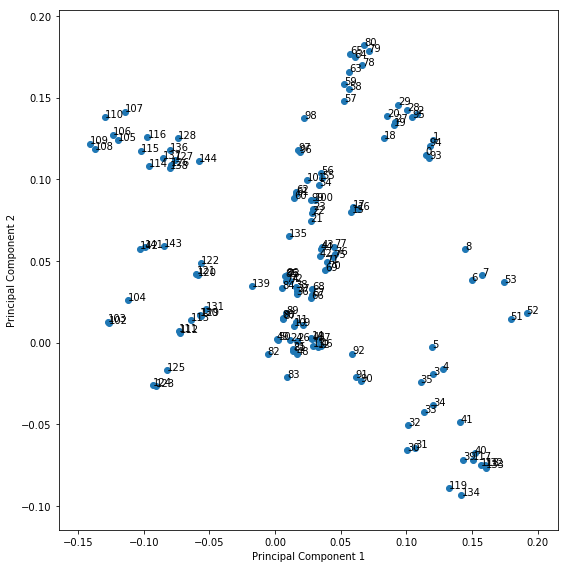

In [71]:
fig = plt.figure(figsize = (8,8))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i], pca_df.PC2[i]))
plt.tight_layout()
plt.show()

In [33]:
# Let's look at the scree plot to find the number of Principal Component needed

In [72]:
pca.explained_variance_ratio_

array([1.15110262e-01, 8.88681372e-02, 6.44293864e-02, 4.90014778e-02,
       4.10030714e-02, 3.51724867e-02, 2.95070206e-02, 2.63270072e-02,
       2.50785498e-02, 2.40909595e-02, 2.28034458e-02, 2.13262564e-02,
       2.03531589e-02, 1.97915955e-02, 1.87924814e-02, 1.63032681e-02,
       1.51530168e-02, 1.44045239e-02, 1.37255947e-02, 1.32039727e-02,
       1.23463100e-02, 1.21946455e-02, 1.15929523e-02, 1.13804859e-02,
       1.04162689e-02, 9.65019297e-03, 9.47710376e-03, 8.45345787e-03,
       8.12476975e-03, 8.01457165e-03, 7.53176040e-03, 7.32387306e-03,
       7.16292678e-03, 6.87340119e-03, 6.76179309e-03, 6.68321279e-03,
       6.42376911e-03, 6.02550981e-03, 5.94433135e-03, 5.74445992e-03,
       5.59465797e-03, 5.43510835e-03, 5.36543370e-03, 5.16916391e-03,
       4.92140439e-03, 4.79615396e-03, 4.60302598e-03, 4.55130691e-03,
       4.48483419e-03, 3.98693979e-03, 3.71195561e-03, 3.67042732e-03,
       3.60166460e-03, 3.40388438e-03, 3.30995060e-03, 3.25410426e-03,
      

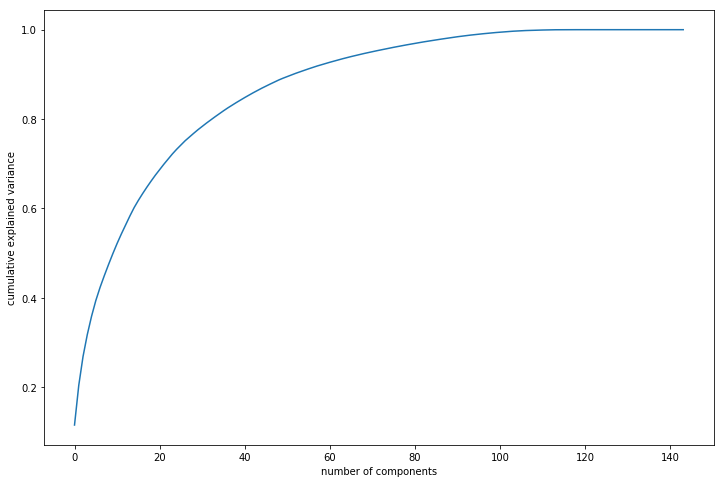

In [73]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [75]:
# We should use incremental PCA as it saves lots of time on large data set
from sklearn.decomposition import IncrementalPCA
incremental_pca = IncrementalPCA(n_components=16)

In [76]:
incremental_pca_train_df = incremental_pca.fit_transform(X_train)
incremental_pca_train_df.shape

(20967, 16)

In [77]:
# Creating correlation matrix for the principal components - we expect little to no correlation
correlation_matrix = np.corrcoef(incremental_pca_train_df.transpose())

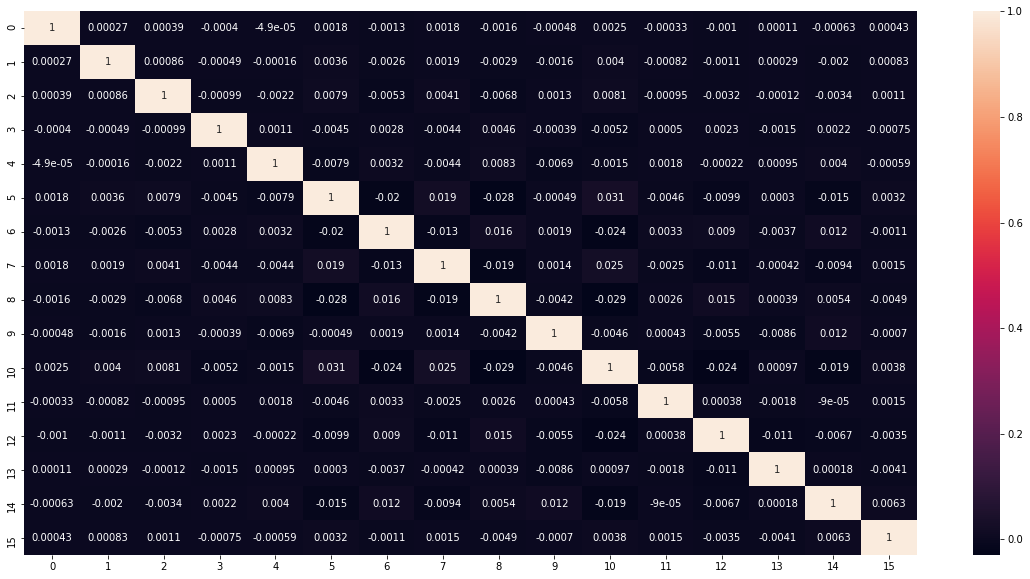

In [78]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(correlation_matrix, annot = True)

In [79]:
# 1s -> 0s in diagonals
corrmat_nodiag = correlation_matrix - np.diagflat(correlation_matrix.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.03104416321124031 , min corr:  -0.029056923793474295


In [80]:
#Applying selected components to the test data - 100 components
incremental_pca_test_df = incremental_pca.transform(X_test)
incremental_pca_test_df.shape

(8986, 16)

In [81]:
print("=============================== USING LOGISTIC REGRESSION ===================================================")

=============================== USING LOGISTIC REGRESSION ===================================================


In [82]:
# Create a Logistic Regression Model based on PCA Components
incremental_pca_learner = LogisticRegression(class_weight="balanced")
incremental_pca_model = incremental_pca_learner.fit(incremental_pca_train_df,y_train)

In [83]:
# Try running Logistic Regression Model created above on test data

y_pred_incremental_pca = incremental_pca_model.predict(incremental_pca_test_df)

In [84]:
confusion = metrics.confusion_matrix(y_test, y_pred_incremental_pca)
confusion

array([[6385, 1920],
       [ 147,  534]])

In [85]:
print("accuracy_score",metrics.accuracy_score(y_test, y_pred_incremental_pca))

TP = confusion[0,0] # true positive
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Sensitivity", TP / float(TP+FN))
print("Specificity", TN / float(TN+FP))
print("Precision", TP / float(TP+FP))

accuracy_score 0.7699755174716225
Sensitivity 0.9774954072259645
Specificity 0.2176039119804401
Precision 0.7688139674894642


In [86]:
unsupervised_pca = PCA(0.95)

In [87]:
unsupervised_pca_train_df = unsupervised_pca.fit_transform(X_train)
unsupervised_pca_train_df.shape

(20967, 71)

In [88]:
# Create a Logistic Regression Model based on PCA Components
unsupervised_pca_learner = LogisticRegression(class_weight="balanced")
unsupervised_pca_model = unsupervised_pca_learner.fit(unsupervised_pca_train_df, y_train)

In [89]:
#Applying selected components to the test data - 71 components

unsupervised_pca_test_df = unsupervised_pca.transform(X_test)
unsupervised_pca_test_df.shape

(8986, 71)

In [90]:
# Try running Logistic Regression Model created above on test data

y_pred_unsupervised_pca = unsupervised_pca_model.predict(unsupervised_pca_test_df)

In [91]:
print("Classification Report")
print(classification_report(y_test, y_pred))

print("Confusion Matrix")
confusion = metrics.confusion_matrix(y_test, y_pred_unsupervised_pca)
confusion

Classification Report
             precision    recall  f1-score   support

          0       0.93      0.99      0.96      8305
          1       0.59      0.15      0.24       681

avg / total       0.91      0.93      0.91      8986

Confusion Matrix


array([[6671, 1634],
       [ 107,  574]])

In [92]:
print("accuracy_score",metrics.accuracy_score(y_test, y_pred_unsupervised_pca))

TP = confusion[0,0] # true positive
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Sensitivity", TP / float(TP+FN))
print("Specificity", TN / float(TN+FP))
print("Precision", TP / float(TP+FP))

accuracy_score 0.8062541731582462
Sensitivity 0.9842136323399233
Specificity 0.259963768115942
Precision 0.8032510535821794


In [93]:
print("=============================== USING RANDOM FOREST CLASSIFIER ==============================================")

=============================== USING RANDOM FOREST CLASSIFIER ==============================================


In [94]:
rfc = RandomForestClassifier(class_weight="balanced")

rfc.fit(unsupervised_pca_train_df, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [95]:
y_pred = rfc.predict(unsupervised_pca_test_df)


In [96]:
print("Classification Report")
print(classification_report(y_test, y_pred))

print("Confusion Matrix")
confusion = metrics.confusion_matrix(y_test, y_pred)
confusion

Classification Report
             precision    recall  f1-score   support

          0       0.93      0.99      0.96      8305
          1       0.57      0.14      0.22       681

avg / total       0.91      0.93      0.91      8986

Confusion Matrix


array([[8234,   71],
       [ 586,   95]])

In [97]:
print("accuracy_score",metrics.accuracy_score(y_test, y_pred))

TP = confusion[0,0] # true positive
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Sensitivity", TP / float(TP+FN))
print("Specificity", TN / float(TN+FP))
print("Precision", TP / float(TP+FP))

accuracy_score 0.9268862675272647
Sensitivity 0.9335600907029479
Specificity 0.572289156626506
Precision 0.9914509331727874
